<img src=../images/gdms-vault.png width=1000 margin=0px>

---


# UC-1 Versioned Secrets - the KV Store v2 (Default Store)

## Business Value of Capability
 * Secure way to store keys and values e.g. configuration data 
 * Ability to recover and roll back - versioning

### Prerequisites
* Running Vault Enterprise instance (even in dev mode) 

<img src=attachment:image.png width=1000>
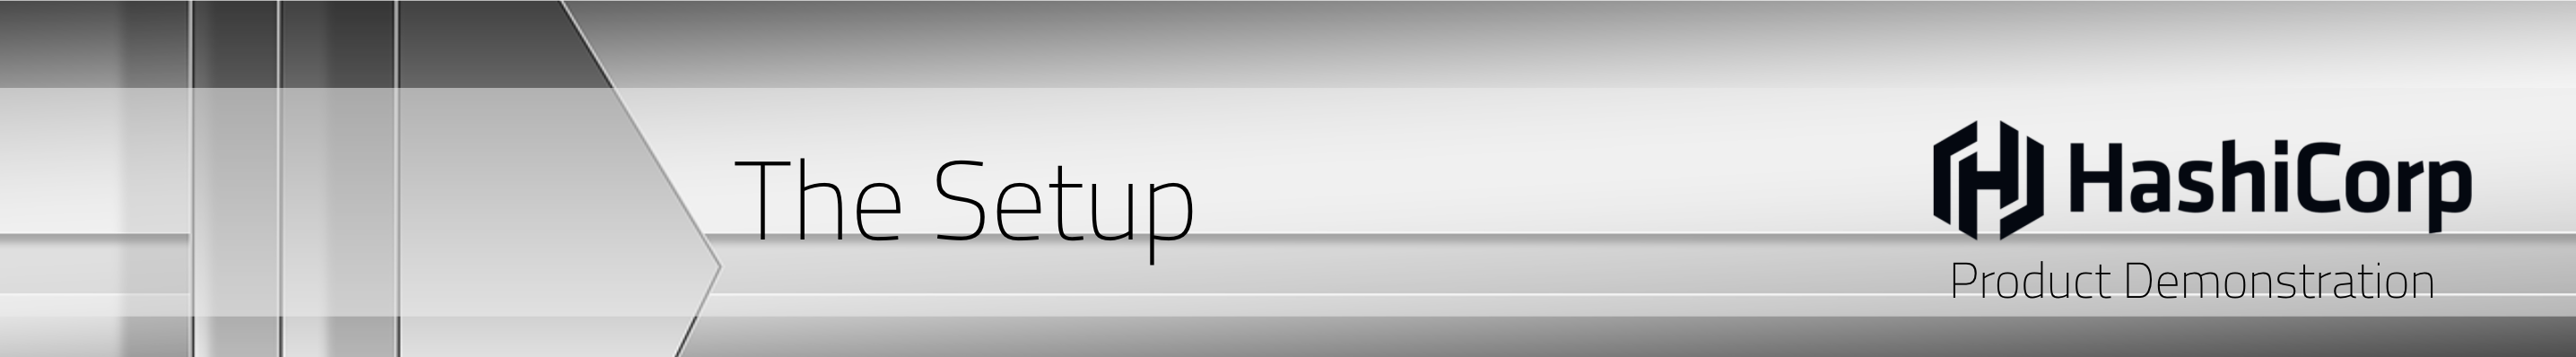

In [ ]:
vault -version

In [ ]:
export VAULT_ADDR=http://127.0.0.1:8200
export VAULT_TOKEN=root
export VAULT_SKIP_VERIFY=true

In [ ]:
vault login root

In [ ]:
vault status

---

<img src=attachment:image.png width=1000>
<br><br>
We will now 
* Enable a secrets engine to save information
* Add and modify secrets
* Retrieve secrets
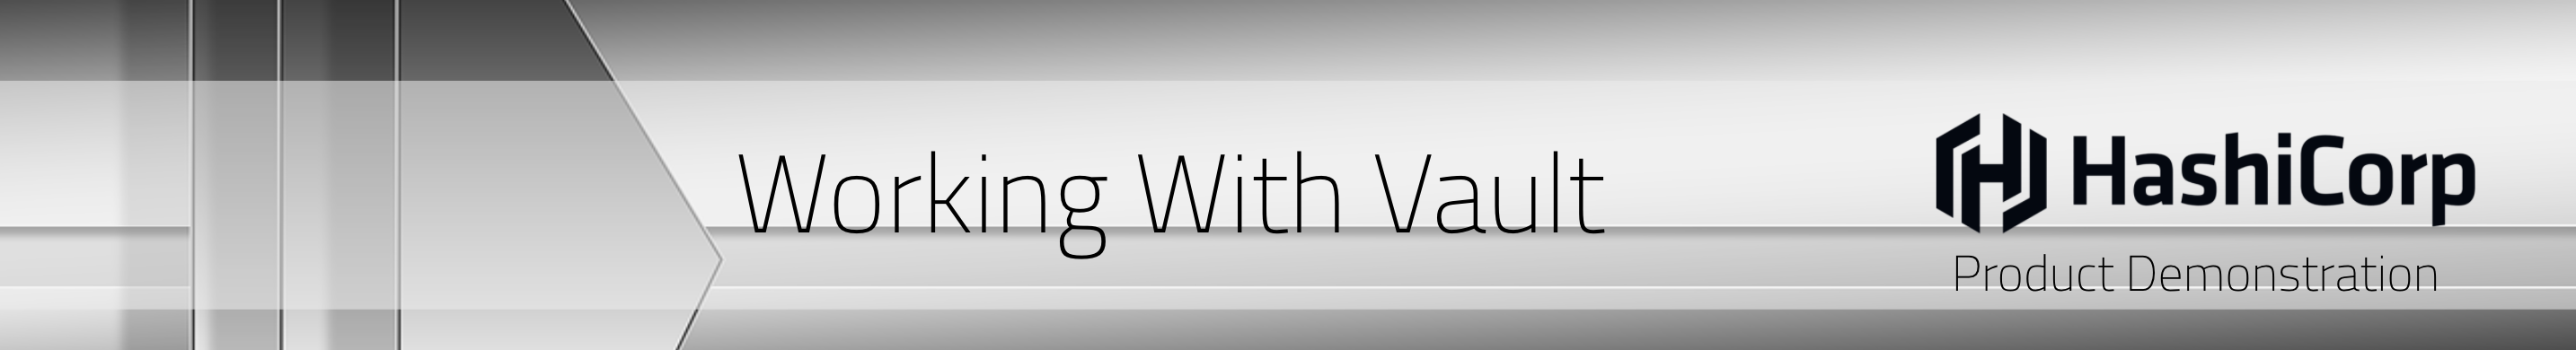

In [ ]:
vault secrets enable -path=demokv2 -version=2 kv

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Put Username and Password into Vault</span>

In [ ]:
# write a secret 
vault kv put demokv2/admin username=jn password=pwd

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Get back the Username and Password from Vault</span>

In [ ]:
vault kv get demokv2/admin

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Replace the Username and Password in Vault</span>
(NOTICE THE VERSION NUMBER)

In [ ]:
## create a second version
vault kv put demokv2/admin username=jane password=doe

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Retrieve Only 1 field</span>

In [ ]:
## pull only one field out
vault kv get -field=password demokv2/admin

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Put a new value in a single field</span>

In [ ]:
## new value in only one field
vault kv put demokv2/admin password=henley

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Notice we have lost data</span>

In [ ]:
## verify username is no longer in the data - it is gone 
vault kv get demokv2/admin

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Patch prevents full replacements</span>

In [ ]:
# patch instead 
vault kv patch demokv2/admin username=james

In [ ]:
## Verify : you did not replace all, but patched
vault kv get demokv2/admin

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Roll back to a prior version at will</span>

In [ ]:
## pull as specific version 
vault kv get -version=2 demokv2/admin

In [ ]:
## List all secrets - will only list secret key not vals
vault kv list demokv2

### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Full HTTP API is also available</span>

In [ ]:
## using command line api 
## this will use an HTTP call to $VAULT_ADDR and 
## submit new data to the path /v1/secret/data/apikey/google
curl --header "X-Vault-Token: root" --request POST \
--data '{"data": {"apikey": "newgoogle"} }' \
$VAULT_ADDR/v1/secret/data/apikey/google | jq

In [ ]:
# Disable generic backends
vault secrets disable supersecret

<img src=attachment:image.png width=1000>
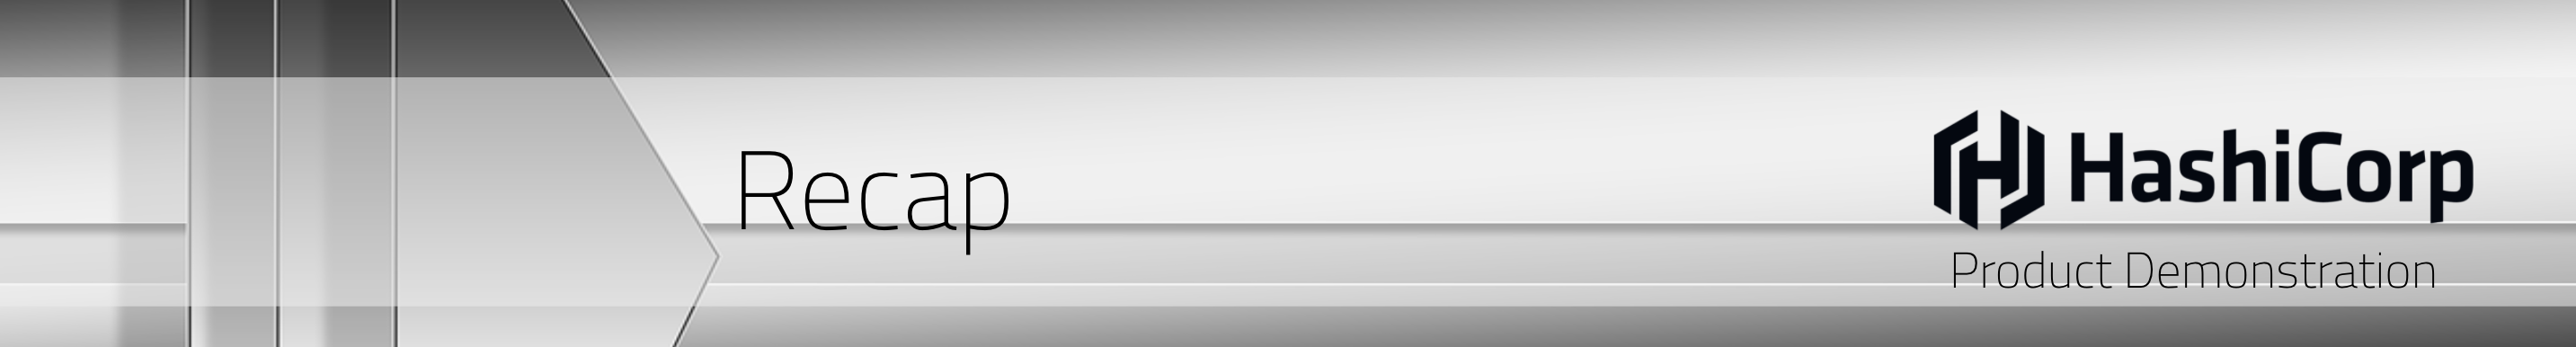

* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Save Secrets Securely</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Use versioning (or not)</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Flexible web or cli api</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Use UI if preferred</span>